LINEAR REGRESSION

Estimated coefficients:
b_0 = 1.2363636363636363 \ 
b_1 = 1.1696969696969697


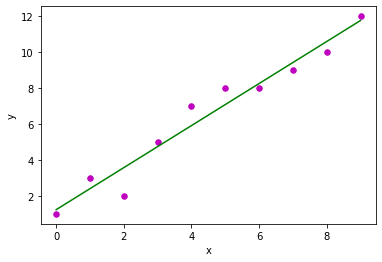

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
	n = np.size(x)
	m_x = np.mean(x)
	m_y = np.mean(y)
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x
	return (b_0, b_1)
def plot_regression_line(x, y, b):
	plt.scatter(x, y, color = "m",marker = "o", s = 30)
	y_pred = b[0] + b[1]*x
	plt.plot(x, y_pred, color = "g")
	plt.xlabel('x')
	plt.ylabel('y')
	plt.show()
def main():
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1]))
	plot_regression_line(x, y, b)
if __name__ == "__main__":
	main()

LOGISTIC REGRESSION

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
from google.colab import files
uploaded = files.upload()

Saving user_data.csv to user_data.csv


In [16]:
data_set = pd.read_csv("user_data.csv")
data_set 

,user id,gender,age,estimatedsalary,purchased,Unnamed: 5
0,1562400,male,19,19000,0,NaN
1,1562401,male,35,20000,0,NaN
2,1562402,female,26,43000,0,NaN
3,1562403,female,27,57000,0,NaN
4,1562404,male,27,76000,0,NaN
5,1562405,male,32,58000,0,NaN
6,1562406,female,25,84000,1,NaN
7,1562407,female,24,15000,0,NaN
8,1562408,male,35,33000,0,NaN
9,1562409,female,32,65000,0,NaN


In [17]:
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values 

In [18]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    27,  76000],
       [    32,  58000],
       [    25,  84000],
       [    24,  15000],
       [    35,  33000],
       [    32,  65000],
       [    18,  86000],
       [    29,  82000],
       [    47,  28000],
       [    48,  48000],
       [    34,  26000],
       [    37,  18000],
       [    20, 150000],
       [    25,  82000],
       [    34,  25000]])

In [19]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [21]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [22]:
y_pred= classifier.predict(x_test) 

In [23]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

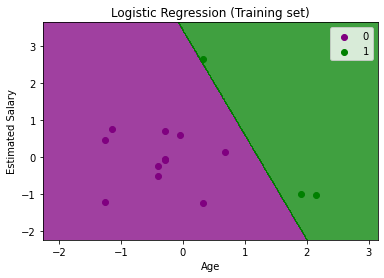

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  